In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from scipy import linalg
from scipy.optimize import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Задание 3

##### 1. Нарисуйте график функции:
y(x) = k∙cos(x – a) + b для некоторых (2-3 различных) значений параметров k, a, b

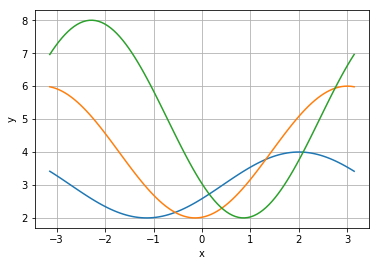

In [2]:
x = np.linspace(-np.pi, np.pi, 101)
k = 1
a = 2
b = 3
k1 = 2
a1 = 3
b1 = 4
k2 = 3
a2 = 4
b2 = 5
plt.plot(x, k*np.cos(x-a)+b)
plt.plot(x, k1*np.cos(x-a1)+b1)
plt.plot(x, k2*np.cos(x-a2)+b2)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('True')
plt.show()

##### 2. Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.

Пусть координатами точки a на плоскости будут (x1, y1), координатами точки b (x2, y2). Пусть координатами тех же точек после ортогонального преобразования будут (X1, Y1) и (X2, Y2) соответсвенно. Допустим, что при ортогональном преобразовании произошло сжатие или расширение плоскости вдоль осей X и Y и расстояние между точками a и b либо уменьшилось, либо увеличилось. Т.о., длина вектора (a,b) в системе (x,y) должна отличаться от длины вектора (a,b) в системе (X, Y).

Зададим координаты точек a и b в системе (x, y)

In [3]:
x1, y1, x2, y2 = 2, 5, 4, 10

Произведем ортогональное преобразование, задав коэффициенты a11, a12, a13 для получения X1 и X2 из x1 и x2 соответственно и коэффициенты a21, a22, a23 для получения Y1 и Y2 из y1 и y2 соотвественно

In [4]:
a11, a12, a13, a21, a22, a23 = 0, 1, 4, 1, 0, 6

In [5]:
X1, Y1, X2, Y2 = (a11*x1 + a12*y1 + a13), (a21*x1 + a22*y1 + a23), (a11*x2 + a12*y2 + a13), (a21*x2 + a22*y2 + a23)

Проверим, что преобразование ортогонально:

In [6]:
print(a11**2 + a21**2 == 1)
print(a12**2 + a22**2 == 1)
print(a11*a12 + a21*a22 == 0)

True
True
True


Найдем длину исходного вектора и длину вектора после преобразования:

In [7]:
a = np.array([x1,y1])
b = np.array([x2,y2])
c = b - a
length_c = np.sqrt([c[0]**2+c[1]**2])

A = np.array([X1,Y1])
B = np.array([X2,Y2])
C = B - A
length_C = np.sqrt([C[0]**2+C[1]**2])

Проверим что длины векторов не равны:

In [8]:
print(length_c != length_C)

[False]


Т.о., наше допущение оказалось неверным. Посмотрим, равны ли длины векторов:

In [9]:
print(length_c == length_C)

[ True]


Вывод: при ортогональном преобразовании сохраняется расстояние между точками.

##### 3. Напишите код:

- который будет переводить полярные координаты в декартовы

Зададим полярные координаты:

In [10]:
a = np.pi/3
R = 5

Преобразуем в декартовы координаты:

In [11]:
x = int(R*np.cos(math.radians(a))*100)/100
y = int(R*np.sin(math.radians(a))*100)/100
x, y

(4.99, 0.09)

- который будет рисовать график окружности в полярных координатах

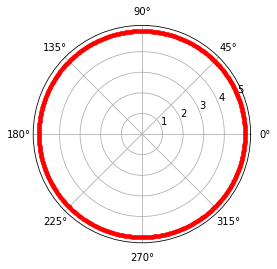

In [12]:
r = np.linspace(0, 2*np.pi, 1001)

for a in r:
    plt.polar(a, R, '.', color = 'red') 

plt.axes().set_aspect('equal')
plt.show()

- который будет рисовать график отрезка прямой линии в полярных координатах

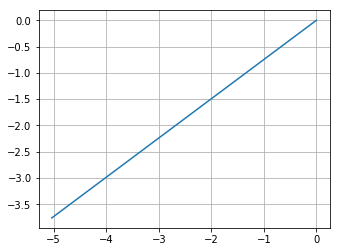

In [35]:
a = 180
r = np.linspace(0, 2*np.pi, 201)                    

plt.plot(r*np.sin(a), r*np.cos(a))
plt.axes().set_aspect('equal')
plt.grid(True)
plt.show()

##### 4. Задание: 

1) Решите систему уравнений:

y = x^2 – 1

exp(x) + x∙(1 – y) = 1

In [14]:
def myFunction(z):
   x = z[0]
   y = z[1]
   
   F = np.empty((2))
   F[0] = x**2-y-1
   F[1] = exp(x)+x*(1-y)-1
   
   return F

zGuess = np.array([1,1])
z = fsolve(myFunction,zGuess)
print('x =', z[0],' ', 'y =', z[1])

x = 1.0812694402316097e-13   y = -0.999999999999867


2) Решите систему уравнений и неравенств:

y = x^2 – 1

exp(x) + x∙(1 – y) > 1

In [15]:
def myFunction(z):
   x = z[0]
   y = z[1]
   
   F = np.empty((2))
   F[0] = x**2-y-1
   F[1] = exp(x)+x*(1-y)-1.1
   
   return F

zGuess = np.array([1,1])
z = fsolve(myFunction,zGuess)
print('x =', z[0],' ', 'y =', z[1])

x = 0.03316017875619968   y = -0.998900402545825
